# Auto-encoder vs PCA avec des données Mnist

In [1]:
import numpy as np
from turtle import * 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import pandas
from keras.datasets import mnist

Using TensorFlow backend.


In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [4]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 784)
(10000, 784)
(60000,)
(10000,)


### 1) Principal Component Analysis (PCA)

In [5]:
from sklearn.decomposition import PCA

##### 1.2 PCA with 2 axis

In [6]:
pca = PCA(n_components=2)
pca.fit(x_train)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [7]:
# Estimation, calcul des composantes principales
C = pca.fit(x_train).transform(x_train)

In [9]:
C[y_train==1,1]

array([-2.38116299, -0.61561867, -0.31979006, ..., -1.67551807,
       -1.6704277 , -1.23232334])

##### 1.2 Display PCA output

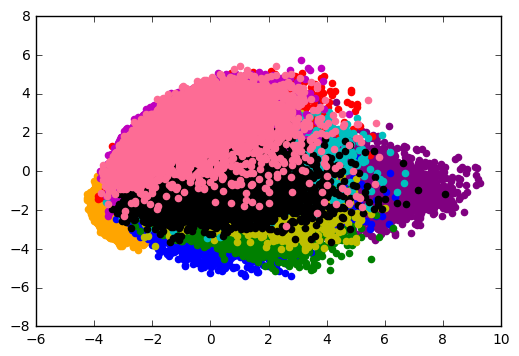

In [11]:
plt.scatter(C[y_train==0,0], C[y_train==0,1], label='0', color="#800080")
plt.scatter(C[y_train==1,0], C[y_train==1,1], label='1', color="orange")
plt.scatter(C[y_train==2,0], C[y_train==2,1], label='2', color="b")
plt.scatter(C[y_train==3,0], C[y_train==3,1], label='3', color="g")
plt.scatter(C[y_train==4,0], C[y_train==4,1], label='4', color="r")
plt.scatter(C[y_train==5,0], C[y_train==5,1], label='5', color="y")
plt.scatter(C[y_train==6,0], C[y_train==6,1], label='6', color="c")
plt.scatter(C[y_train==7,0], C[y_train==7,1], label='7', color="m")
plt.scatter(C[y_train==8,0], C[y_train==8,1], label='8', color="k")
plt.scatter(C[y_train==9,0], C[y_train==9,1], label='9', color="#FD6C95")

### 2) Non linear deep auto-encoder with keras

In [12]:
from keras.layers import Input, Dense
from keras.models import Model

##### 2.1 Build an non linear deep auto-encoder architecture (like the Hinton's article about dimensionality reduction)

In [13]:
# Size of our encoded representations (compression of input image from 784 floats to 2 floats)
encoding_dim = 2

# Input placeholder :
input_img = Input(shape=(784,))

# Encoded representation of the input (="encoded") :
encoded = Dense(50, activation='relu')(input_img)
encoded = Dense(encoding_dim, activation='relu')(encoded)

# Lossy reconstruction of the input (="decoded") :
decoded = Dense(50, activation='relu')(encoded)
decoded = Dense(784, activation='sigmoid')(decoded)

# Model maps an input to its encoded representation :
encoder = Model(input_img, encoded)
# Model maps an input to its reconstruction :
autoencoder = Model(input_img, decoded)

# create a placeholder for an encoded (32-dimensional) input
encoded_input_1 = Input(shape=(encoding_dim,))
encoded_input_2 = Input(shape=(50,))
encoded_input_3 = Input(shape=(784,))

# retrieve the last layer of the autoencoder model
decoder_layer_2 = autoencoder.layers[-2]
decoder_layer_3 = autoencoder.layers[-1]

# Decoder model
decoder_1 = Model(input=encoded_input_1, output=decoder_layer_3(decoder_layer_2(encoded_input_1)))

# Pass optimizer (adadelta) with a 'mean squared error" loss
autoencoder.compile(optimizer='adadelta', loss='mean_squared_error')

##### 3.2 Trained an auto-encoder and predict

In [ ]:
autoencoder.fit(x_train, x_train, nb_epoch=100, batch_size=256, shuffle=True, validation_data=(x_train,x_train))

Train on 60000 samples, validate on 60000 samples
Epoch 1/100
60000/60000 [==============================] - 6s - loss: 0.0473 - val_loss: 0.0474  768/60000 [..............................] - ETA: 6s - loss: 0.0467

In [38]:
encoded_imgs=encoder.predict(np.array(x_train))
decoded_imgs=decoder_1.predict(encoded_imgs)

In [17]:
encoded_imgs.shape

(60000, 2)

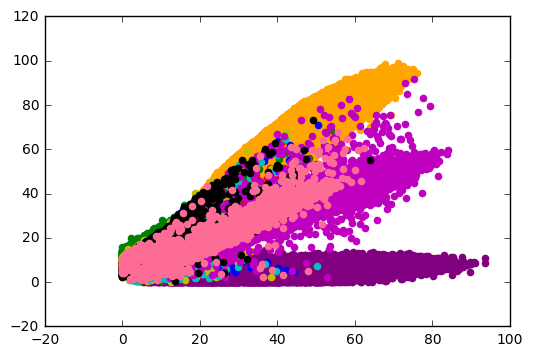

In [39]:
plt.scatter(encoded_imgs[y_train==0,0], encoded_imgs[y_train==0,1], label='0', color="#800080")
plt.scatter(encoded_imgs[y_train==1,0], encoded_imgs[y_train==1,1], label='1', color="orange")
plt.scatter(encoded_imgs[y_train==2,0], encoded_imgs[y_train==2,1], label='2', color="b")
plt.scatter(encoded_imgs[y_train==3,0], encoded_imgs[y_train==3,1], label='3', color="g")
plt.scatter(encoded_imgs[y_train==4,0], encoded_imgs[y_train==4,1], label='4', color="r")
plt.scatter(encoded_imgs[y_train==5,0], encoded_imgs[y_train==5,1], label='5', color="y")
plt.scatter(encoded_imgs[y_train==6,0], encoded_imgs[y_train==6,1], label='6', color="c")
plt.scatter(encoded_imgs[y_train==7,0], encoded_imgs[y_train==7,1], label='7', color="m")
plt.scatter(encoded_imgs[y_train==8,0], encoded_imgs[y_train==8,1], label='8', color="k")
plt.scatter(encoded_imgs[y_train==9,0], encoded_imgs[y_train==9,1], label='9', color="#FD6C95")

### 3) Auto-encoder with Bernouilli Restricted Boltzmann Machine (RBM)

In [31]:
from sklearn.neural_network import BernoulliRBM

In [49]:
modelRBM = BernoulliRBM(n_components=2, n_iter=20)

In [50]:
modelRBM.fit(x_train)

BernoulliRBM(batch_size=10, learning_rate=0.1, n_components=2, n_iter=20,
       random_state=None, verbose=0)

In [52]:
encodedRBM=modelRBM.transform(x_train)
encodedRBM.shape

(60000, 2)

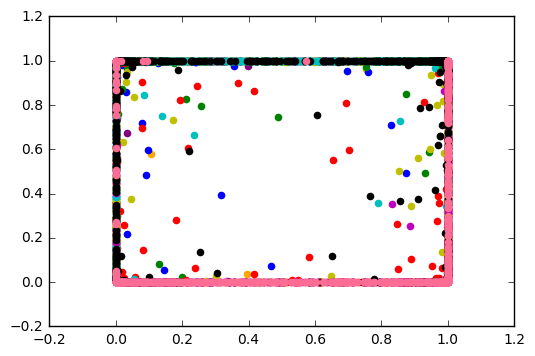

In [53]:
plt.scatter(encodedRBM[y_train==0,0], encodedRBM[y_train==0,1], label='0', color="#800080")
plt.scatter(encodedRBM[y_train==1,0], encodedRBM[y_train==1,1], label='1', color="orange")
plt.scatter(encodedRBM[y_train==2,0], encodedRBM[y_train==2,1], label='2', color="b")
plt.scatter(encodedRBM[y_train==3,0], encodedRBM[y_train==3,1], label='3', color="g")
plt.scatter(encodedRBM[y_train==4,0], encodedRBM[y_train==4,1], label='4', color="r")
plt.scatter(encodedRBM[y_train==5,0], encodedRBM[y_train==5,1], label='5', color="y")
plt.scatter(encodedRBM[y_train==6,0], encodedRBM[y_train==6,1], label='6', color="c")
plt.scatter(encodedRBM[y_train==7,0], encodedRBM[y_train==7,1], label='7', color="m")
plt.scatter(encodedRBM[y_train==8,0], encodedRBM[y_train==8,1], label='8', color="k")
plt.scatter(encodedRBM[y_train==9,0], encodedRBM[y_train==9,1], label='9', color="#FD6C95")

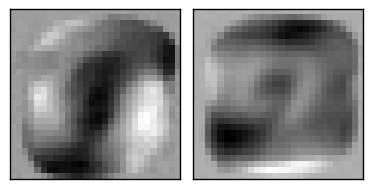

In [54]:
plt.figure(figsize=(4.2, 4))
for i, comp in enumerate(modelRBM.components_):
    plt.subplot(1, 2, i + 1)
    plt.imshow(comp.reshape((28, 28)), cmap=plt.cm.gray_r,
               interpolation='nearest')
    plt.xticks(())
    plt.yticks(())
plt.subplots_adjust(0.08, 0.02, 0.92, 0.85, 0.08, 0.23)

plt.show()